# Text Analytics of The Grimm Brother's Tales

## Cluster Analysis


In [3]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [4]:
text_ff = pd.read_pickle("C:/Users/dalit/DataScience/data/book-excerpts_ff.pckl")
text_ff.shape

(140, 10882)

In [5]:
text = text_ff.iloc[:,0:text_ff.shape[1]-1]
text.shape

(140, 10881)

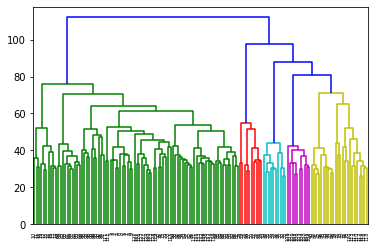

In [6]:
Z = linkage(text, method = 'ward')
den = dendrogram(Z)

Using sklearn.cluster 
 
* Euclidean

In [6]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [7]:
clustering = AgglomerativeClustering(linkage="ward",affinity="euclidean").fit(text)
cl = clustering.labels_
pd.crosstab(text_ff['label'], cl)

col_0,0,1
label,,
Animal Tales,0,18
Tales of Magic,9,17


In [8]:
metrics.adjusted_rand_score(text_ff['label'], cl)

0.02615962213879143

* Manhattan

In [11]:
clustering = AgglomerativeClustering(linkage="complete",affinity="manhattan").fit(text)
cl = clustering.labels_
pd.crosstab(text_ff['label'], cl)

col_0,0,1
label,,
Animal Tales,18,0
Tales of Magic,25,1


In [12]:
metrics.adjusted_rand_score(text_ff['label'], cl)

-0.01397244323694926

* Cosine

In [27]:
clustering = AgglomerativeClustering(linkage="complete",affinity="cosine").fit(text)
cl = clustering.labels_
pd.crosstab(text_ff['label'], cl)

col_0,0,1
label,,
Animal Tales,11,7
Tales of Magic,26,0


In [18]:
metrics.adjusted_rand_score(text_ff['label'], cl)

0.22887015570895403

* Precomputed

In [24]:
clustering = AgglomerativeClustering(linkage="complete",affinity="precomputed").fit(text)
cl = clustering.labels_
pd.crosstab(text_ff['label'], cl)

col_0,0,1
label,,
Animal Tales,9,9
Tales of Magic,20,6


In [25]:
metrics.adjusted_rand_score(text_ff['label'], cl)

0.0795565874411177

## k-means

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(text)
cl = kmeans.labels_
pd.crosstab(text_ff['label'], cl)

col_0,0,1
label,,
Animal Tales,18,0
Tales of Magic,17,9


In [29]:
metrics.adjusted_rand_score(text_ff['label'], cl)

0.02615962213879143

## PCA

In [38]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(text)

sum(pca.explained_variance_ratio_[0:18])

#print(pca.explained_variance_ratio_)

0.8040544482439822

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=18)
pca.fit(text)

print(pca.explained_variance_ratio_)

[0.2041367  0.07757707 0.06938311 0.06225114 0.05141457 0.03976655
 0.03280147 0.03144784 0.03078528 0.02802564 0.02724311 0.02633702
 0.0242279  0.02162922 0.02127631 0.0203958  0.01838545 0.0169368 ]


In [40]:
pca.singular_values_

array([145.24277477,  89.53661772,  84.67610481,  80.206147  ,
        72.89153312,  64.10515612,  58.22113579,  57.00716044,
        56.4034342 ,  53.81604564,  53.05940272,  52.16957304,
        50.03707239,  47.27749456,  46.89020381,  45.90969504,
        43.5884231 ,  41.83595384])

In [41]:
x_pca = pca.transform(text)

In [42]:
text_ff['label'] = pd.Categorical(text_ff['label'])
text_ff['labels'] = text_ff['label'].cat.codes

Text(0, 0.5, 'Second Principal Component')

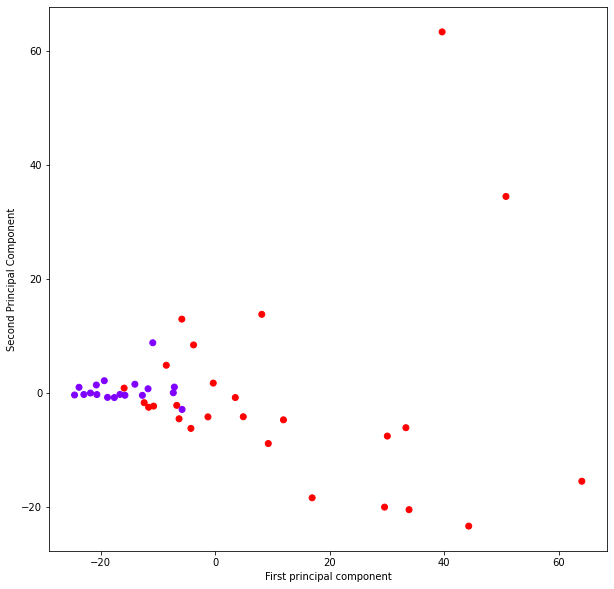

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c=text_ff['labels'],cmap="rainbow")
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')